In [1]:
import pandas
from datetime import datetime
from pytz import utc
import matplotlib.pyplot as plt

data = pandas.read_csv("reviews.csv", parse_dates=['Timestamp'])
data.head()

/Users/wangxf108/.pyenv/versions/3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


,Course Name,Timestamp,Rating,Comment
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN


### 

### 1. Rating average/count by day

In [2]:
data['Day'] = data['Timestamp'].dt.date
data.head()

,Course Name,Timestamp,Rating,Comment,Day
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02


In [3]:
#此处按照月来区分，并且得到月的值

#data['Month'] = data['Timestamp'].dt.month
#data.head()

In [4]:
#建立新的column，然后将所有项按照不同day来区分，然后求出不同天的Rating平均值mean（）

#注释：此时day is index and Rating is the only column. 

data['Day'] = data['Timestamp'].dt.date

#此处用mean（）来求平均值，而平均值只适用于Rating（）一项，所以，其他文字项目自动被忽略掉。如下图。如果换成count，则会记录所有想，并输出其数量。
day_average = data.groupby(['Day']).mean()
day_average

,Rating
Day,
2018-01-01,4.532609
2018-01-02,4.122807
2018-01-03,4.360465
2018-01-04,4.531250
2018-01-05,4.423077
...,...
2021-03-29,4.240000
2021-03-30,4.428571
2021-03-31,4.453125


In [5]:
#查看其类型，是pandasdataframe

type(day_average)

pandas.core.frame.DataFrame

In [6]:
#获取index 列表
list(day_average.index)

[datetime.date(2018, 1, 1),
 datetime.date(2018, 1, 2),
 datetime.date(2018, 1, 3),
 datetime.date(2018, 1, 4),
 datetime.date(2018, 1, 5),
 datetime.date(2018, 1, 6),
 datetime.date(2018, 1, 7),
 datetime.date(2018, 1, 8),
 datetime.date(2018, 1, 9),
 datetime.date(2018, 1, 10),
 datetime.date(2018, 1, 11),
 datetime.date(2018, 1, 12),
 datetime.date(2018, 1, 13),
 datetime.date(2018, 1, 14),
 datetime.date(2018, 1, 15),
 datetime.date(2018, 1, 16),
 datetime.date(2018, 1, 17),
 datetime.date(2018, 1, 18),
 datetime.date(2018, 1, 19),
 datetime.date(2018, 1, 20),
 datetime.date(2018, 1, 21),
 datetime.date(2018, 1, 22),
 datetime.date(2018, 1, 23),
 datetime.date(2018, 1, 24),
 datetime.date(2018, 1, 25),
 datetime.date(2018, 1, 26),
 datetime.date(2018, 1, 27),
 datetime.date(2018, 1, 28),
 datetime.date(2018, 1, 29),
 datetime.date(2018, 1, 30),
 datetime.date(2018, 1, 31),
 datetime.date(2018, 2, 1),
 datetime.date(2018, 2, 2),
 datetime.date(2018, 2, 3),
 datetime.date(2018, 2, 4)

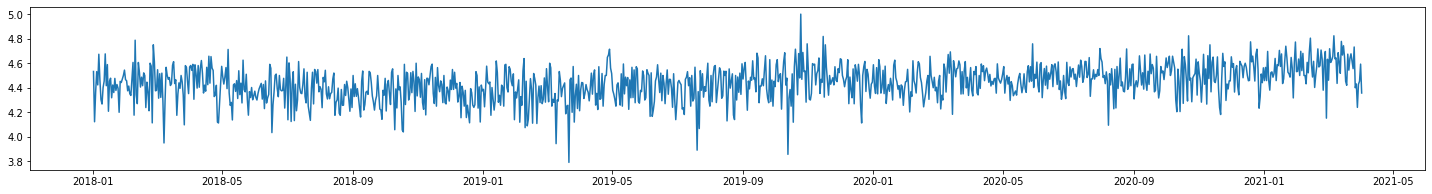

In [7]:
#开始作图

data['Day'] = data['Timestamp'].dt.date
day_average = data.groupby(['Day']).mean()

#设置图的宽和高
plt.figure(figsize=(25, 3))
plt.plot(day_average.index, day_average['Rating'])

In [8]:
day_average['Rating'].min()

3.7916666666666665

### 

### 2. Rating average by week

In [9]:
# Give the table a new column of Week

data['Week'] = data['Timestamp'].dt.week
data

<ipython-input-9-17d08018764c>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week'] = data['Timestamp'].dt.week


,Course Name,Timestamp,Rating,Comment,Day,Week
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,13
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,13
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,13
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,13
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,13
...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,1
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,1
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,1
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,1


In [10]:
# 上面的方法也能得到结果，但是好像被下面的代替了。结果相同。

data['Week'] = data['Timestamp'].dt.isocalendar().week
print(data['Week'].max(),  data['Week'].min())

53 1


In [11]:
# 这一步得到的是年和对应第几周

data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
data['Week']

0        2021-13
1        2021-13
2        2021-13
3        2021-13
4        2021-13
          ...   
44995    2018-00
44996    2018-00
44997    2018-00
44998    2018-00
44999    2018-00
Name: Week, Length: 45000, dtype: object

In [12]:
# 这一步得到的是月和对应第几周

data['Week'] = data['Timestamp'].dt.strftime('%m-%U')
data['Week']

0        04-13
1        04-13
2        04-13
3        04-13
4        04-13
         ...  
44995    01-00
44996    01-00
44997    01-00
44998    01-00
44999    01-00
Name: Week, Length: 45000, dtype: object

In [13]:
#可以用 空格 来代替上面的 -

data['Week'] = data['Timestamp'].dt.strftime('%m      %U')
data['Week']

0        04      13
1        04      13
2        04      13
3        04      13
4        04      13
            ...    
44995    01      00
44996    01      00
44997    01      00
44998    01      00
44999    01      00
Name: Week, Length: 45000, dtype: object

In [14]:
# 利用年分组的数据

data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
week_average

,Rating
Week,
2018-00,4.434564
2018-01,4.424933
2018-02,4.417702
2018-03,4.401024
2018-04,4.468085
...,...
2021-09,4.560096
2021-10,4.627315
2021-11,4.629121


In [15]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()
week_average.index

Index(['2018-00', '2018-01', '2018-02', '2018-03', '2018-04', '2018-05',
       '2018-06', '2018-07', '2018-08', '2018-09',
       ...
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12', '2021-13'],
      dtype='object', name='Week', length=173)

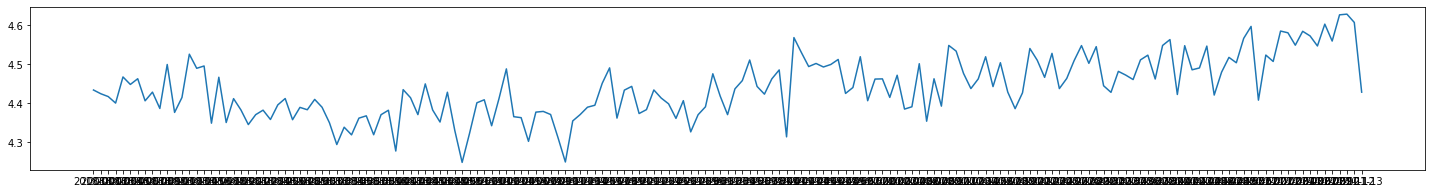

In [16]:
data['Week'] = data['Timestamp'].dt.strftime('%Y-%U')
week_average = data.groupby(['Week']).mean()

plt.figure(figsize=(25, 3))
plt.plot(week_average.index, week_average['Rating'])

### 3. Average rating by month

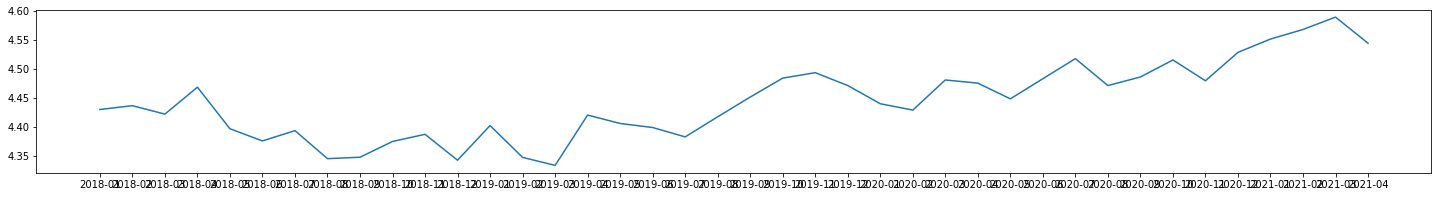

In [17]:

data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average = data.groupby(['Month']).mean()

plt.figure(figsize=(25, 3))
plt.plot(month_average.index, month_average['Rating'])

In [18]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
data['Month']

0        2021-04
1        2021-04
2        2021-04
3        2021-04
4        2021-04
          ...   
44995    2018-01
44996    2018-01
44997    2018-01
44998    2018-01
44999    2018-01
Name: Month, Length: 45000, dtype: object

In [19]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%U')
data['Month']

0        2021-13
1        2021-13
2        2021-13
3        2021-13
4        2021-13
          ...   
44995    2018-00
44996    2018-00
44997    2018-00
44998    2018-00
44999    2018-00
Name: Month, Length: 45000, dtype: object

In [20]:
month_average.head()

,Rating
Month,
2018-01,4.429645
2018-02,4.436248
2018-03,4.421671
2018-04,4.468211
2018-05,4.396420


#### 

### 4. Average rating by month by course

In [21]:
#此处创建了一个以course name 和 rating 作为 column 的数据表格。(但事实上，求mean()以后，真个表格只有一个column 就是 rating)

data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean()
month_average_crs[:20]

Rating
Month   Course Name                                                 
2018-01 100 Python Exercises I: Evaluate and Improve Yo...  4.353448
        Data Processing with Python                         4.500000
        Interactive Data Visualization with Python and ...  4.285714
        Learn GIS in One Hour                               4.236842
        Python for Beginners with Examples                  4.355422
        The Python Mega Course: Build 10 Real World App...  4.457368
2018-02 100 Python Exercises I: Evaluate and Improve Yo...  4.250000
        Data Processing with Python                         4.205882
        Interactive Data Visualization with Python and ...  4.157895
        Learn GIS in One Hour                               4.437500
        Python for Beginners with Examples                  4.363095
        The Python Mega Course: Build 10 Real World App...  4.481070
2018-03 100 Python Exercises I: Evaluate and Improve Yo...  4.500000
        Data Processing with Python                         4.281250
        Interactive Data Visualization with Python and ...  4.266667
        Learn GIS in One Hour                               4.166667
        Python for Beginners with Examples                  4.357143
        The Python Mega Course: Build 10 Real World App...  4.447037
2018-04 100 Python Exercises I: Evaluate and Improve Yo...  4.431034
        Data Processing with Python                         4.468750

In [22]:
# apple unstack method to unstack data frame. 

data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()
month_average_crs[:20]

Rating  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                               4.353448         
2018-02                                               4.250000         
2018-03                                               4.500000         
2018-04                                               4.431034         
2018-05                                               4.358696         
2018-06                                               4.268293         
2018-07                                               4.589286         
2018-08                                               4.353659         
2018-09                                               4.238636         
2018-10                                               4.106061         
2018-11                                               4.212766         
2018-12                                               4.405172         
2019-01                                               4.048780         
2019-02                                               4.333333         
2019-03                                               4.269231         
2019-04                                               4.365854         
2019-05                                               4.486111         
2019-06                                               4.442308         
2019-07                                               4.414634         
2019-08                                               4.222222         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11                                                    NaN          
2018-12                                                    NaN          
2019-01                                                    NaN          
2019-02                                                    NaN          
2019-03                                                    NaN          
2019-04                                                    NaN          
2019-05                                                    NaN          
2019-06                                               4.722222          
2019-07                                               4.427273          
2019-08                                               4.416667          

                                         \
Course Name Data Processing with Python   
Month                                     
2018-01                        4.500000   
2018-02                        4.205882   
2018-03                        4.281250   
2018-04                        4.468750   
2018-05                        4.176471   
2018-06                        4.631579   
2018-07                        4.159091   
2018-08                        4.411765   
2018-09                        4.173913   
2018-10                        4.464286   
2018-11                        4.462963   
2018-12                        3.985294   
2019-01                        4.033333   
2019-02                        4.3000

<AxesSubplot:xlabel='Month'>

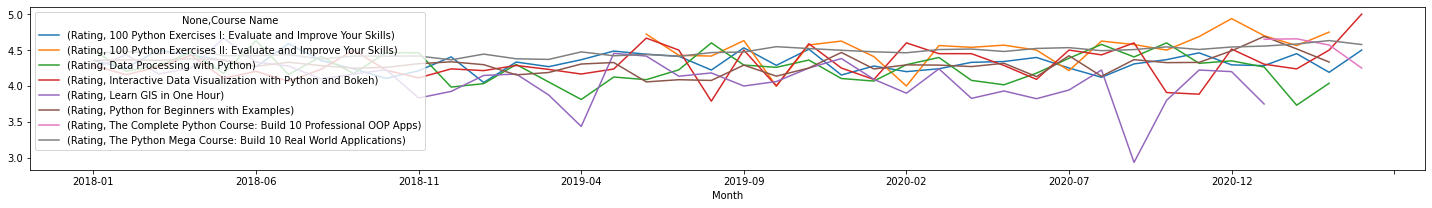

In [23]:
# average_crs.plot 更像是一个loop 将所有y轴的row都表示一遍。

data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()

month_average_crs.plot(figsize=(25, 3))

<AxesSubplot:xlabel='Month'>

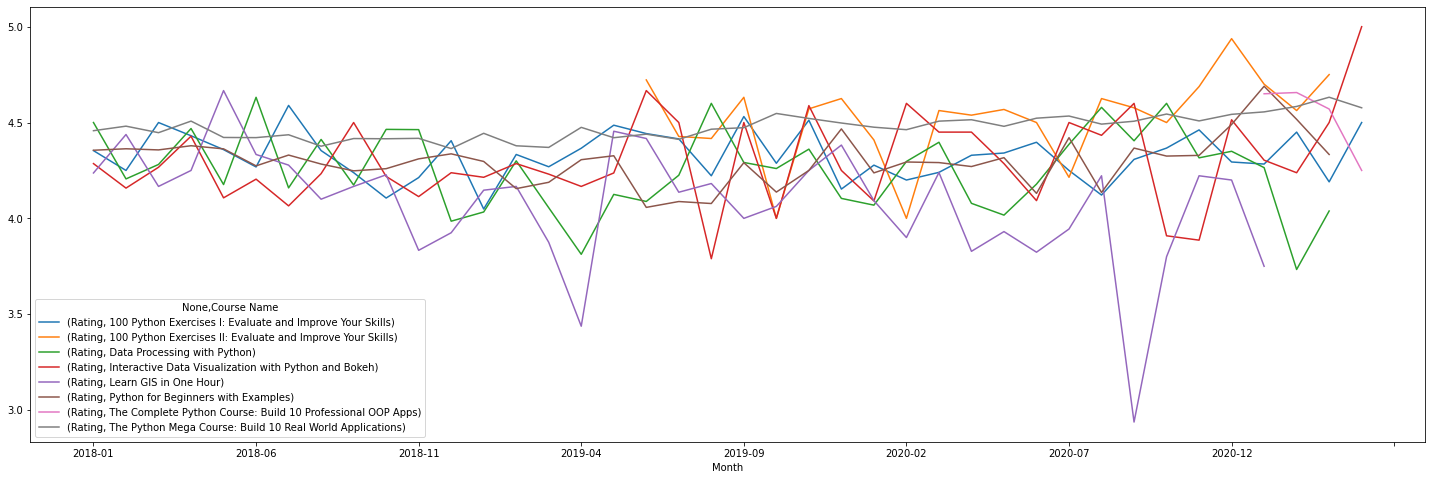

In [24]:
data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).mean().unstack()

month_average_crs.plot(figsize=(25, 8))

<AxesSubplot:xlabel='Month'>

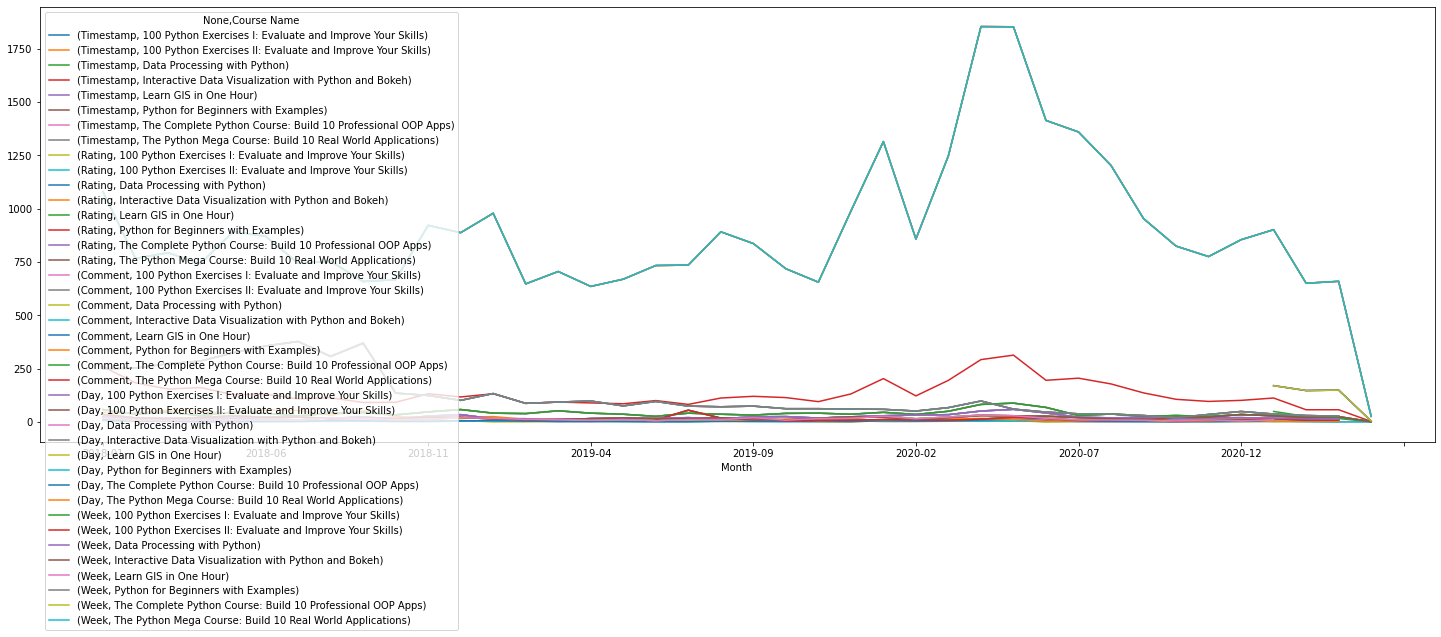

In [25]:
# 此时用count(), 会出现一些 其他的legend

data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name']).count().unstack()

month_average_crs.plot(figsize=(25, 8))

In [26]:
month_average_crs


Timestamp  \
Course Name 100 Python Exercises I: Evaluate and Improve Your Skills   
Month                                                                  
2018-01                                                   58.0         
2018-02                                                   36.0         
2018-03                                                   46.0         
2018-04                                                   29.0         
2018-05                                                   46.0         
2018-06                                                   41.0         
2018-07                                                   28.0         
2018-08                                                   41.0         
2018-09                                                   44.0         
2018-10                                                   33.0         
2018-11                                                   47.0         
2018-12                                                   58.0         
2019-01                                                   41.0         
2019-02                                                   39.0         
2019-03                                                   52.0         
2019-04                                                   41.0         
2019-05                                                   36.0         
2019-06                                                   26.0         
2019-07                                                   41.0         
2019-08                                                   36.0         
2019-09                                                   32.0         
2019-10                                                   40.0         
2019-11                                                   41.0         
2019-12                                                   36.0         
2020-01                                                   45.0         
2020-02                                                   35.0         
2020-03                                                   50.0         
2020-04                                                   82.0         
2020-05                                                   88.0         
2020-06                                                   68.0         
2020-07                                                   30.0         
2020-08                                                   37.0         
2020-09                                                   26.0         
2020-10                                                   30.0         
2020-11                                                   26.0         
2020-12                                                   34.0         
2021-01                                                   30.0         
2021-02                                                   20.0         
2021-03                                                   21.0         
2021-04                                                    3.0         

                                                                       \
Course Name 100 Python Exercises II: Evaluate and Improve Your Skills   
Month                                                                   
2018-01                                                    NaN          
2018-02                                                    NaN          
2018-03                                                    NaN          
2018-04                                                    NaN          
2018-05                                                    NaN          
2018-06                                                    NaN          
2018-07                                                    NaN          
2018-08                                                    NaN          
2018-09                                                    NaN          
2018-10                                                    NaN          
2018-11      

<AxesSubplot:xlabel='Month'>

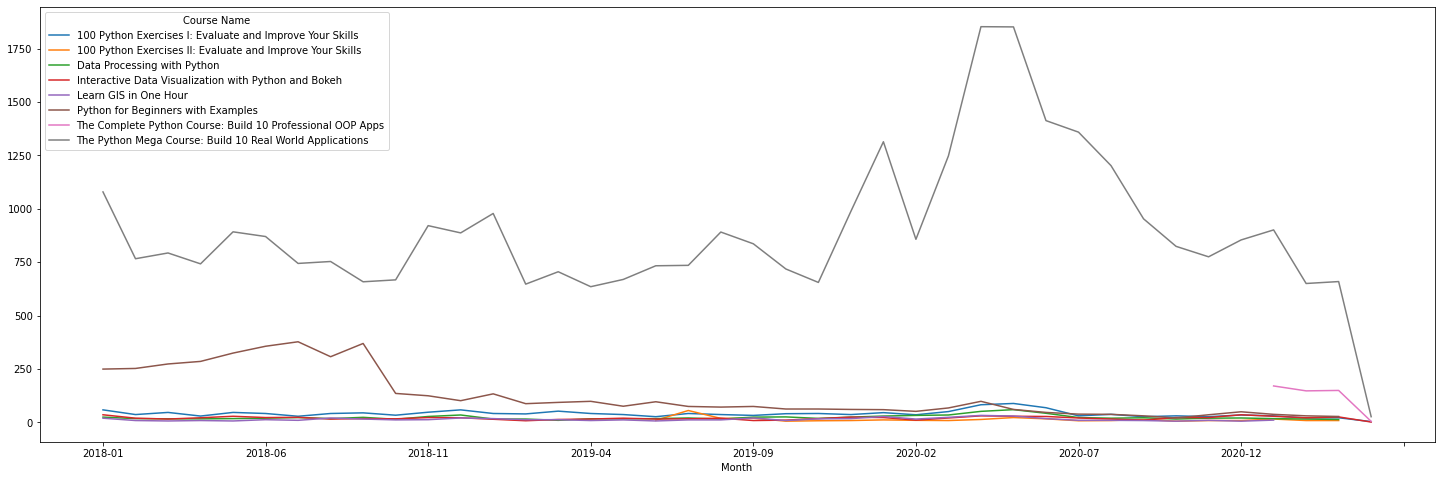

In [27]:
# 此时用count(), 会出现一些 其他的legend. 加入 ['Rating'] 以后，就会排除文字部分的干扰。

data['Month'] = data['Timestamp'].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month', 'Course Name'])['Rating'].count().unstack()

month_average_crs.plot(figsize=(25, 8))

### 

### 5. What day are people the happiest?

In [31]:
data

,Course Name,Timestamp,Rating,Comment,Day,Week,Month
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04
...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,2018-00,2018-01
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,2018-00,2018-01
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,2018-00,2018-01
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,2018-00,2018-01


In [32]:
# Add a new column for the table.  %A indicate the day (Monday or Tuesday etc.)

data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday
...,...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,2018-00,2018-01,Monday
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday


In [33]:
# get the weekday's average

data['Weekday'] = data['Timestamp'].dt.strftime('%A')
weekday_average = data.groupby(['Weekday']).mean()
weekday_average

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


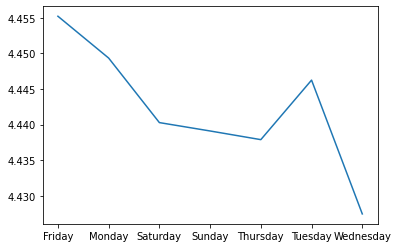

In [35]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
weekday_average = data.groupby(['Weekday']).mean()
plt.plot(weekday_average.index, weekday_average['Rating'])

In [36]:
# 此时，是按照星期的首字母的前后顺序进行排序的

data['Weekday'] = data['Timestamp'].dt.strftime('%A')

weekday_average = data.groupby(['Weekday']).mean()
weekday_average = weekday_average.sort_values('Weekday')
weekday_average

#plt.plot(weekday_average.index, weekday_average['Rating'])

,Rating
Weekday,
Friday,4.455207
Monday,4.449335
Saturday,4.440274
Sunday,4.439097
Thursday,4.437880
Tuesday,4.446240
Wednesday,4.427452


In [37]:
# 加入新的column， 在不同星期的后面， 加入对应数字

data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')
data

#weekday_average = data.groupby(['Weekday']).mean()
#weekday_average = weekday_average.sort_values('Weekday')
#weekday_average

#plt.plot(weekday_average.index, weekday_average['Rating'])

,Course Name,Timestamp,Rating,Comment,Day,Week,Month,Weekday,Daynumber
0,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 06:25:52+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
1,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:12:34+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
2,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 05:11:03+00:00,4.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
3,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:33:24+00:00,5.0,NaN,2021-04-02,2021-13,2021-04,Friday,5
4,The Python Mega Course: Build 10 Real World Ap...,2021-04-02 03:31:49+00:00,4.5,NaN,2021-04-02,2021-13,2021-04,Friday,5
...,...,...,...,...,...,...,...,...,...
44995,Python for Beginners with Examples,2018-01-01 01:11:26+00:00,4.0,NaN,2018-01-01,2018-00,2018-01,Monday,1
44996,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:09:56+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday,1
44997,The Python Mega Course: Build 10 Real World Ap...,2018-01-01 01:08:11+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday,1
44998,Python for Beginners with Examples,2018-01-01 01:05:26+00:00,5.0,NaN,2018-01-01,2018-00,2018-01,Monday,1


In [45]:
# 可以看到 week_average 有两个index， 所以在创建图形式，系统不知道给哪个命名为 x 轴上。

weekday_average.index

MultiIndex([(   'Sunday', '0'),
            (   'Monday', '1'),
            (  'Tuesday', '2'),
            ('Wednesday', '3'),
            ( 'Thursday', '4'),
            (   'Friday', '5'),
            ( 'Saturday', '6')],
           names=['Weekday', 'Daynumber'])

In [46]:
#命名index中的第一个 weekday 作为x 轴。

weekday_average.index.get_level_values(0)

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'],
      dtype='object', name='Weekday')

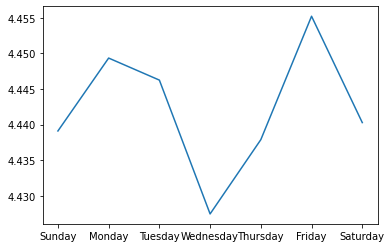

In [44]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')

plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])

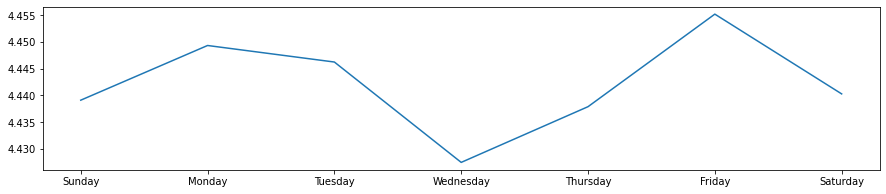

In [48]:
data['Weekday'] = data['Timestamp'].dt.strftime('%A')
data['Daynumber'] = data['Timestamp'].dt.strftime('%w')

weekday_average = data.groupby(['Weekday', 'Daynumber']).mean()
weekday_average = weekday_average.sort_values('Daynumber')

plt.figure(figsize=[15, 3])
plt.plot(weekday_average.index.get_level_values(0), weekday_average['Rating'])